<a href="https://colab.research.google.com/github/alouwyck/dania-international-days/blob/main/machine_learning/Intro_to_Machine_Learning_demo_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

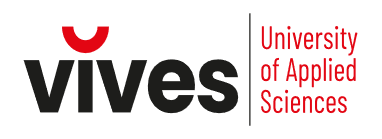<br>

**Dania International Days**<br>
13 - 15 March 2024<br><br>
Workshop by Andy Louwyck

---



---



# **INTRODUCTION TO MACHINE LEARNING WITH PYTHON**

## **What is Machine Learning?**

Classical programming

In [ ]:
threshold = 17
temperature = float(input("What is the temperature?\n"))  # data
heating = 'on' if temperature < threshold else 'off'      # rule
print(f'The heating is {heating}!')                       # answer

Machine learning

In [ ]:
import pandas as pd  # Python library for data analysis

temperature = [17.1, 15.6, 23.1, 19.8, 12.9, 20.3, 14.7, 16.2]  # data (input)
heating = ['off', 'on', 'off', 'off', 'on', 'off', 'on', 'on']  # answers (output)
table = pd.DataFrame(dict(temperature=temperature, heating=heating))
table

In [ ]:
import numpy as np  # numeric Python
import matplotlib.pyplot as plt  # visualization library

def plot_temperature_heating(table):
    '''
    plots heating vs temperature
    table: Pandas DataFrame with columns 'temperature' and 'heating'
    returns: axes
    '''
    _, ax = plt.subplots(1, 1, figsize=(8, 2))
    on = table.heating == 'on'
    off = ~on
    plt.plot(table[on].temperature, np.ones(on.sum()), 'go');
    plt.plot(table[off].temperature, np.zeros(off.sum()), 'ro');
    plt.xlabel('temperature');
    plt.ylabel('heating');
    plt.yticks((0, 1));
    ax.set_yticklabels(('off', 'on'))
    plt.grid();
    return ax

In [ ]:
plot_temperature_heating(table);

Naive learning algorithm

In [ ]:
max_temperature_on = table[table.heating=='on']['temperature'].max()
min_temperature_off = table[table.heating=='off']['temperature'].min()
threshold = (max_temperature_on + min_temperature_off) / 2
print(f'maximum temperature if heating is on: {max_temperature_on}°C')
print(f'minimum temperature if heating is off: {min_temperature_off}°C')
print(f'threshold is {threshold}°C')

In [ ]:
ax = plot_temperature_heating(table);
yl = ax.get_ylim();
ax.plot(threshold * np.ones(2), [-1, 2], 'b-');
ax.set_ylim(yl);

Nearest neighbor

In [ ]:
temperature = float(input("What is the temperature?\n"))  # input temperature
abs_difference = (temperature - table.temperature).abs()  # absolute difference
heating = table.heating.iloc[abs_difference.argmin()]     # label of nearest neighbor
print(f'The heating is {heating}!')                       # answer

In [ ]:
ax = plot_temperature_heating(table);
ax.plot(temperature, heating == 'on', 'bo');

## **Classification**

### K Nearest Neighbors

Take K nearest neighbors instead of only 1

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)  # instantiate with K = 3
model.fit(table[['temperature']].values, table.heating=='on')  # fit data

new_temperature = 17.0
model.predict([[new_temperature]]).item()  # predict label for new temperature value

In [ ]:
ax = plot_temperature_heating(table);
ax.plot(new_temperature, 1, 'bo');

In [ ]:
model.score(table[['temperature']].values, table.heating=='on')  # returns accuracy

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty=None)  # instantiate
model.fit(table[['temperature']].values, table.heating=='on')  # fit data

threshold = -model.intercept_.item() / model.coef_.item()  # determine threshold
print(f'threshold is {threshold}°C')

model.predict([[new_temperature]]).item()  # predict label for new temperature value

In [ ]:
model.score(table[['temperature']].values, table.heating=='on')  # accuracy

In [ ]:
ax = plot_temperature_heating(table);
sigmoid = lambda f: 1 / (1 + np.exp(-f))
f = lambda x: model.coef_.item() * x + model.intercept_.item()
x = np.linspace(12, 24, 1000)
xl, yl = ax.get_xlim(), ax.get_ylim()
ax.plot(x, sigmoid(f(x)), 'k--');
ax.plot(threshold * np.ones(2), [-1, 2], 'b-');
ax.set_xlim(xl); ax.set_ylim(yl);

## **Regression**

The dataset

In [ ]:
import pandas as pd
df = pd.read_csv('Student_Marks.csv')
df.head()  # show the first 5 records

In [ ]:
df.describe().T  # T transposes the resulting table

In [ ]:
import matplotlib.pyplot as plt
df.plot.scatter(x='time_study', y='Marks');
plt.grid();

Simple linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

X, y = df[['time_study']].values, df.Marks.values  # feature X, target y

model = LinearRegression()  # instantiate class
model.fit(X, y)  # fit data
model.score(X, y)  # R² score

In [ ]:
df.plot.scatter(x='time_study', y='Marks');
xline = np.array([[0, 8]]).T  # must be 2D matrix!
yline = model.predict(xline)  # predict regression line
plt.plot(xline, yline, 'r-');
plt.grid();

Underfitting!

Polynomial regression

In [ ]:
import numpy as np
X = X.flatten()               # polyfit wants 1D array!
a = np.polyfit(X, y, deg=15)  # polynomial fit of degree 15

In [ ]:
from sklearn.metrics import r2_score  # import function to calculate R² score

yp = np.polyval(a, X)          # predictions
r2_score(y_true=y, y_pred=yp)  # R² score

In [ ]:
xcurve = np.linspace(0, 8, 100)  # create 100 equally spaced points x between 0 and 8
ycurve = np.polyval(a, xcurve)   # predict y for these 100 points x
df.plot.scatter(x='time_study', y='Marks')
plt.plot(xcurve, ycurve, 'r-');
plt.grid();

Overfitting!

Create validation set

In [ ]:
from sklearn.model_selection import train_test_split

X, y = df[['time_study']].values, df.Marks.values  # feature X, target y
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.4,      # 40% is used for validation
                                                  random_state=2024)  # set random seed

In [ ]:
plt.scatter(X_train.flatten(), y_train, color='blue', label='training set');
plt.scatter(X_val.flatten(), y_val, color='red', label='validation set');
plt.legend();
plt.xlabel('time_study');
plt.ylabel('Marks');
plt.grid();

In [ ]:
# linear regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print(f"training: {linreg.score(X_train, y_train)}")
print(f"validation: {linreg.score(X_val, y_val)}")

In [ ]:
# polynomial regression (degree 15)
a = np.polyfit(X_train.flatten(), y_train, deg=15)  # polynomial fit of degree 15
print(f"training: {r2_score(y_true=y_train, y_pred=np.polyval(a, X_train.flatten()))}")
print(f"validation: {r2_score(y_true=y_val, y_pred=np.polyval(a, X_val.flatten()))}")

The model complexity graph

In [ ]:
from sklearn.metrics import mean_absolute_error as MAE  # import MAE function

mae_train = []  # list of MAEs of training data
mae_val = []    # list of MAEs of validation data
coef = []       # list of coefficients
degrees = range(1, 21)  # range of degrees of polynomial function

for degree in degrees:  # loop through degrees

    a = np.polyfit(X_train.flatten(), y_train, degree)  # polynomial fit of training data
    yp_train = np.polyval(a, X_train.flatten())         # predictions of training data
    yp_val = np.polyval(a, X_val.flatten())             # predictions of validation data

    coef.append(a)  # coefficients
    mae_train.append(MAE(y_true=y_train, y_pred=yp_train))  # MAE of training data
    mae_val.append(MAE(y_true=y_val, y_pred=yp_val))        # MAE of validation data

In [ ]:
from matplotlib.animation import FuncAnimation
from matplotlib import rc
rc('animation', html='jshtml')

# initialization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # figure containing 2 axes
ax1.plot(X_train.flatten(), y_train, 'b.', label='training set');
ax1.plot(X_val.flatten(), y_val, 'r.', label='validation set');
ax1.legend();
xplot = np.linspace(0, 8, 1000)
regression_line = ax1.plot(xplot, np.polyval(coef[0], xplot),'k-')
ax1.set_title('degree = 1');
ax1.set_xlabel('time_study');
ax1.set_ylabel('Marks');
ax1.grid();
ax2.yaxis.set_label_position("right");
ax2.yaxis.tick_right();
mae_train_line = ax2.plot(degrees[0], mae_train[0], 'b.-', label='training');
mae_val_line = ax2.plot(degrees[0], mae_val[0], 'r.-', label='validation');
ax2.legend();
ax2.set_xlabel('Degree');
ax2.set_ylabel('MAE');
ax2.set_xlim((0, 21));
ax2.set_ylim((1, 5));
ax2.grid();

# update function for animation
def update(degree):
    yplot = np.polyval(coef[degree-1], xplot)
    regression_line[0].set_ydata(yplot)
    ax1.set_title('degree = ' + str(degree));
    mae_train_line[0].set_xdata(degrees[:degree])
    mae_train_line[0].set_ydata(mae_train[:degree])
    mae_val_line[0].set_xdata(degrees[:degree])
    mae_val_line[0].set_ydata(mae_val[:degree])

# create animation
ani = FuncAnimation(fig, update, frames=degrees, blit=False, repeat=True)
plt.close()
ani

In [ ]:
plt.plot(degrees, mae_train, 'b.-', label='training');
plt.plot(degrees, mae_val, 'r.-', label='validation');
plt.legend();
plt.xlabel('Degree');
plt.ylabel('MAE');
plt.grid();

In [ ]:
# polynomial fit degree 2

a = np.polyfit(X.flatten(), y, deg=2)
yp = np.polyval(a, X.flatten())
MAE(y_true=y, y_pred=yp)

In [ ]:
df.plot.scatter(x='time_study', y='Marks');
xplot = np.linspace(0, 8, 100)
plt.plot(xplot, np.polyval(a, xplot), 'r-');
plt.grid();

Regularization: LASSO

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 10

lasso = make_pipeline(
    PolynomialFeatures(degree, include_bias=False),
    Lasso(alpha=0.1, tol=0.1)
)
lasso.fit(X, y);

MAE(y_true=y, y_pred=lasso.predict(X))

In [ ]:
df.plot.scatter(x='time_study', y='Marks');
xplot = np.linspace(0, 8, 100).reshape(-1, 1)
plt.plot(xplot, lasso.predict(xplot), 'r-');
plt.grid();